# 1. Introduction - Cohort Analysis

This notebook will use cohort analysis on a dataset of bank customers.

What is cohort analysis? From https://corporatefinanceinstitute.com/resources/business-intelligence/cohort-analysis/:

Cohort Analysis is a form of behavioral analytics that takes data from a given subset, such as a business, and groups it into related groups rather than looking at the data as one unit. The groupings are referred to as cohorts. They share similar characteristics such as time and size and decision-making.

Companies use cohort analysis to analyze customer behavior across the life cycle of each customer. In the absence of cohort analysis, businesses may experience difficulties in understanding the life cycle that each customer goes through over a given timeframe. Businesses use cohort analysis to understand the trends and patterns of customers over time and to tailor their offers of products and services to the identified cohorts.

# 2. Import Libraries

The always necessary libraries; NumPy, Matplotlib, and Pandas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 3. Import the Dataset

We will be utilizing a dataset of bank customers, containing a wide swath of customers and their information, along with their churn status (are they withdrawing funds/leaving the bank, or not?).

In [2]:
df = pd.read_csv(r'C:\Users\Acer\Downloads\bank_churn\churn_modeling.csv')

#  4. Explore the Dataset

Leet's look at the basic foundations of the dataset (variables, size, distributions, nulls/non-nulls, etc).

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

* Variables:

    * RowNumber = Row number of the dataset
    
    * CustomerID = Customer's identification number
    
    * Surname = Customer's last name
    
    * CreditScore = Customer's credit score
    
    * Geography = Where the customer is based (on a country basis)
    
    * Gender = Sex of customer
    
    * Age = Age of customer
    
    * Tenure = How long the customer has been with the bank
    
    * Balance = Deposit balances customer has with the bank
    
    * NumOfProducts = Number of products customer has with bank (CC, loan, etc)
    
    * HasCrCard = Whether a customer has a credit card or not
    
    * IsActiveMember = Is the customer active with the bank (make a lot of deposits, etc)?
    
    * EstimatedSalary = Estimated salary of the customer
    
    * Exited = Churn or not (Churn is 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.shape

(10000, 14)

* Appears to be a dataset of 10,000 customers; a good amount of data to work from.


* Also, it follows there are no non-null values in the dataset (10000 rows; all columns have 10000 non-null data entries).

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* Notes:

    * Credit score of customers in the dataset ranges from 350 to 850
    
    * Youngest customer in the dataset is 18; oldest customer is 92
    
    * Some customers have not been there for up to a year or are not deposit customers with the bank whatsoever (I'm assuming that is 0 tenure); some have been at the bank for more than 10 years
    
    * Some have no money with the bank, some have 250,000 dollars
    
    * All the customers have at least one product, while some have up to 4
    
    * A customer has an estimated 11 dollar per year salary (?), while the high end customers have about a 200,000 dollar salary

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

* Interesting that there are 10,000 customers, but less than 3,000 unique surnames; could we assume marriages here, or is it coincidental?

* Only 3 countries which the bank draws data from.

In [9]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

* Our non-null hypothesis is verified; no N/A throughout dataset.

# 5. Exploratory Data Analysis

Let's explore the variables of the dataset in an elementary way; basic histograms and bar charts to understand what we are working with.

0    7963
1    2037
Name: Exited, dtype: int64


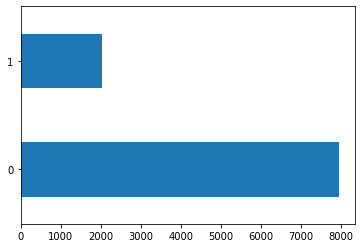

In [40]:
df['Exited'].value_counts().plot(kind='barh')
print(df['Exited'].value_counts())

* __Right off the bat, we see that the imbalance of the class variable Exited is significant, as there are basically four non-exiting customers to every one exiting customer; we will need to keep this in mind.__

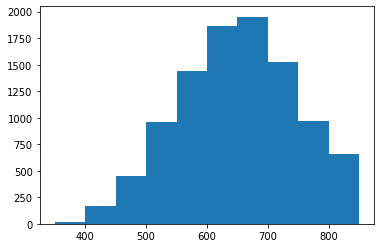

In [43]:
plt.hist(df['CreditScore'])
plt.show()

* As we would expect, very normally distributed credit scores across the range of customers; less extremely low/high scores, mostly moderate.

<AxesSubplot:>

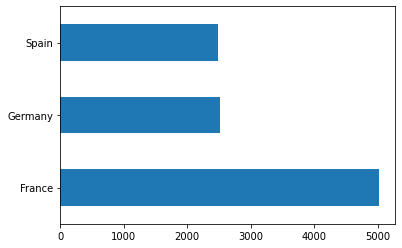

In [13]:
df['Geography'].value_counts().plot(kind='barh')

* About half of the customers from the dataset are from France; the other half are pretty much equally Spain and Germany.

<AxesSubplot:>

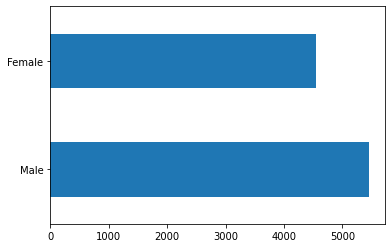

In [44]:
df['Gender'].value_counts().plot(kind='barh')

* Though there are slightly more males than females in the datset, the imbalance is not impossible to overcome; in addition, it is not our target variable.

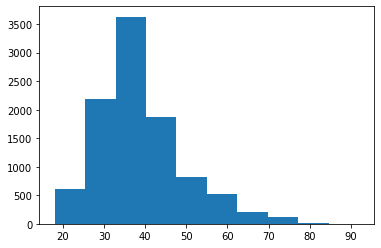

In [45]:
plt.hist(df['Age'])
plt.show()

* The distribution of age is somewhere between normally distributed and skewed right; though there is a bell curve that is identifiable, it could also be seen that there are relatively less customers in the later years...there's a trail-off especially after, say, 60.

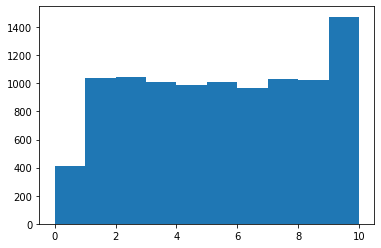

In [99]:
plt.hist(df['Tenure'])
plt.show()

* Outside of the extremes (0 and 10), the destribution of tenures (how long a customer in the dataset has been with the bank) is pretty evenly distributed. 


* It does seem interesting that the highest amount of customers have 10 years as tenure...feels like the bank has pretty loyal clients.

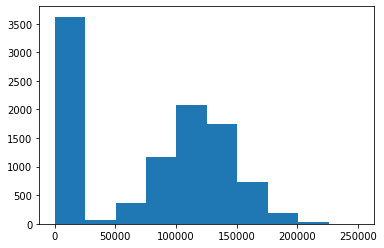

In [47]:
plt.hist(df['Balance'])
plt.show()

* Very interesting distribution; it appears to be fairly normally distributed in relation to the depositi balances the customers have with the bank, outside of the fact that so many of the customers have 0 or low balances with the bank...which seems to go against what we assumed in terms of loyalty earlier. Also doesn't seem like the demographics of the bank is young enough to have so many clients with low balances (unless it's a bank that just is struggling with the deposit competition), and most of the clients aren't exiting...hmm.

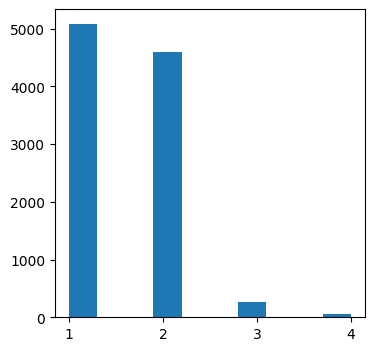

In [213]:
#plt.figure(figsize=(4, 4))
plt.hist(df['NumOfProducts'])
#plt.style.use('default')
plt.xticks([1,2,3,4])
plt.show()

* Almost even, between customers having 1 or 2 products...very few have more than that.

<AxesSubplot:>

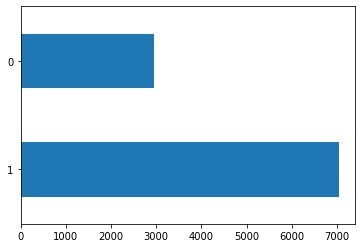

In [49]:
df['HasCrCard'].value_counts().plot(kind='barh')

* Probably around 70% of the clients have a credit card.

<AxesSubplot:>

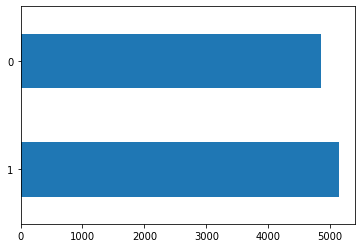

In [50]:
df['IsActiveMember'].value_counts().plot(kind='barh')

* It appears to be about even, as it pertains to customers that are active with the bank, and customers that have inactive accounts.

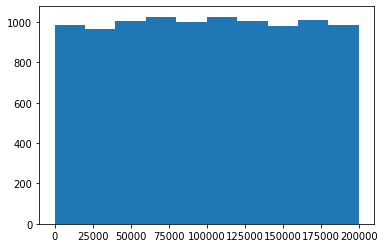

In [51]:
plt.hist(df['EstimatedSalary'])
plt.show()

* Very evenly distributed as far as salaries of customers, even with as great a range as 0 to 200,000 dollars.

# 6. Cohort Analysis

We now have a basic idea of the data in the dataset, now let's understand it based on churn status; let us compare relative data, based on those in the dataset who are staying with the bank, versus those that are withdrawing from the bank.

__Due to the class imbalance of the Exited variable, the stacked barcharts have been made relative to 100% of either non-churn (0) or churn (1); although there are almost 4 non-churns to 1 churn, they are calculated and depicted side-by-side on a percentage of whole scale, and discussed on a "relative basis".__ 

__Also, for the continuous variables, as experimenting with stacked histograms were ineffective in telling the story, are binned, separated and shown on a probability density basis, as you'll see below, which provides clear insight on that data.__

In [214]:
df_exit = df.loc[df['Exited'] == 1]
df_nonexit = df.loc[df['Exited'] == 0]

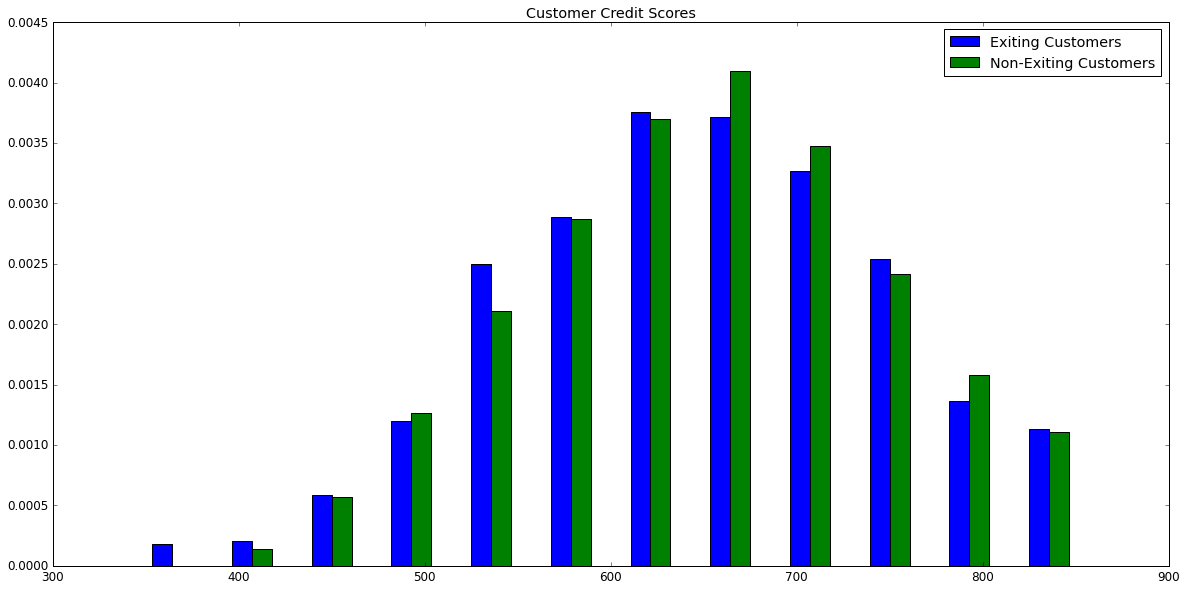

In [113]:
plt.figure(figsize=(20,10))
plt.style.use('classic')
plt.hist([df_exit['CreditScore'], df_nonexit['CreditScore']], density=True, bins=np.linspace(300, 900, 15), \
         label=["Exiting Customers", "Non-Exiting Customers"], rwidth=0.5)
plt.legend()
plt.title('Customer Credit Scores')
plt.show()

* ___Credit score distribution does not materially differ between the customers leaving and the customers staying.___

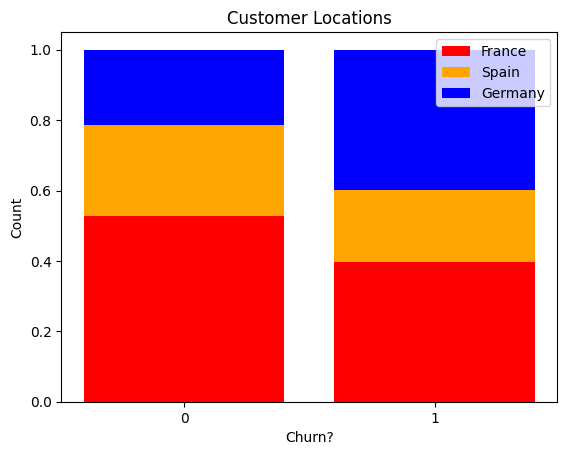

In [177]:
x = [0, 1]
France = np.array([(len(df.loc[(df['Geography'] == 'France') & (df['Exited'] == 0)]))/(len(df.loc[df['Exited'] == 0])), \
          (len(df.loc[(df['Geography'] == 'France') & (df['Exited'] == 1)])) / (len(df.loc[df['Exited'] == 1]))])
Spain = np.array([(len(df.loc[(df['Geography'] == 'Spain') & (df['Exited'] == 0)])) / (len(df.loc[df['Exited'] == 0])), \
          (len(df.loc[(df['Geography'] == 'Spain') & (df['Exited'] == 1)])) / (len(df.loc[df['Exited'] == 1]))])
Germany = np.array([(len(df.loc[(df['Geography'] == 'Germany') & (df['Exited'] == 0)])) / (len(df.loc[df['Exited'] == 0])), \
          (len(df.loc[(df['Geography'] == 'Germany') & (df['Exited'] == 1)])) / (len(df.loc[df['Exited'] == 1]))])

plt.bar(x, France, color='red')
plt.bar(x, Spain, bottom=France, color='orange')
plt.bar(x, Germany, bottom=France+Spain, color='blue')
plt.xlabel("Churn?")
plt.ylabel("Count")
plt.legend(["France", "Spain", "Germany"])
plt.title("Customer Locations")
plt.style.use('fast')
plt.xticks([0,1])
plt.show()

* ___Interestingly, there does seem to be a greater relative proportion of customers leaving from Germany than are staying; the opposite can be said of France and Spain.___

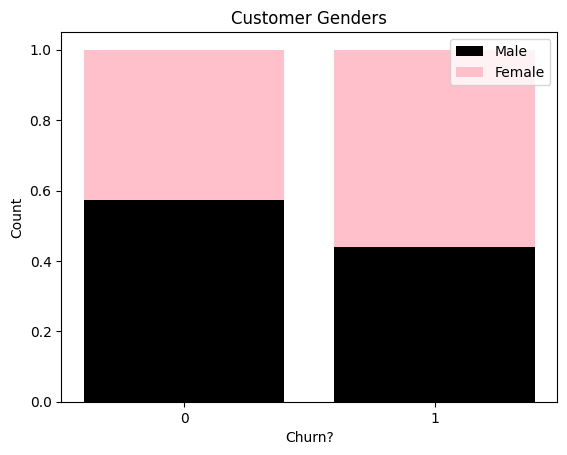

In [179]:
# create data
x = [0, 1]
Male = np.array([(len(df.loc[(df['Gender'] == 'Male') & (df['Exited'] == 0)])) /(len(df.loc[df['Exited'] == 0])), \
          (len(df.loc[(df['Gender'] == 'Male') & (df['Exited'] == 1)])) /(len(df.loc[df['Exited'] == 1]))])
Female = np.array([(len(df.loc[(df['Gender'] == 'Female') & (df['Exited'] == 0)])) /(len(df.loc[df['Exited'] == 0])), \
          (len(df.loc[(df['Gender'] == 'Female') & (df['Exited'] == 1)])) /(len(df.loc[df['Exited'] == 1]))])

plt.bar(x, Male, color='black')
plt.bar(x, Female, bottom=Male, color='pink')
plt.xlabel("Churn?")
plt.ylabel("Count")
plt.legend(["Male", "Female"])
plt.title("Customer Genders")
plt.style.use('default')
plt.xticks([0, 1])
plt.show()

* ___There are a greater relative proportion of females leaving than males; more males make up the proportion of those staying.___

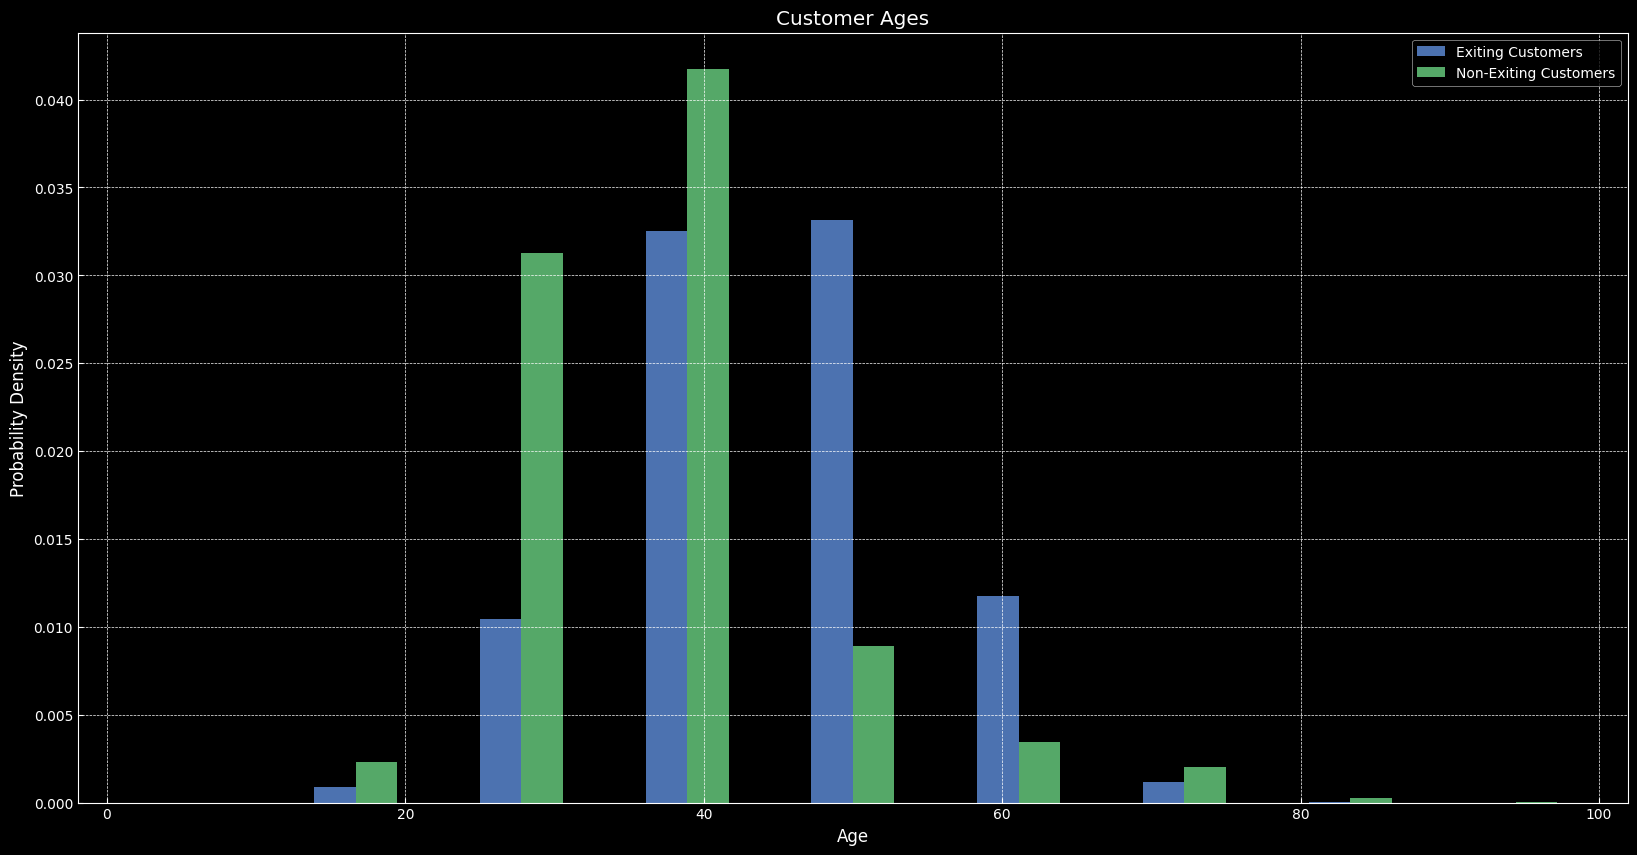

In [184]:
plt.figure(figsize=(20,10))
plt.style.use('seaborn-deep')
plt.hist([df_exit['Age'], df_nonexit['Age']], density=True, bins=np.linspace(0, 100, 10), \
         label=["Exiting Customers", "Non-Exiting Customers"], rwidth=0.5)
plt.legend()
plt.title('Customer Ages')
plt.xlabel("Age")
plt.ylabel("Probability Density")
plt.show()

* ___It does seem as if up to (younger than) 40, a material amount more customers are staying, compared to the relative amount that customers that age are leaving; that dynamic seems to flip on its head afterwards, as many more customers on a relative basis are leaving the bank as opposed to staying.___ 

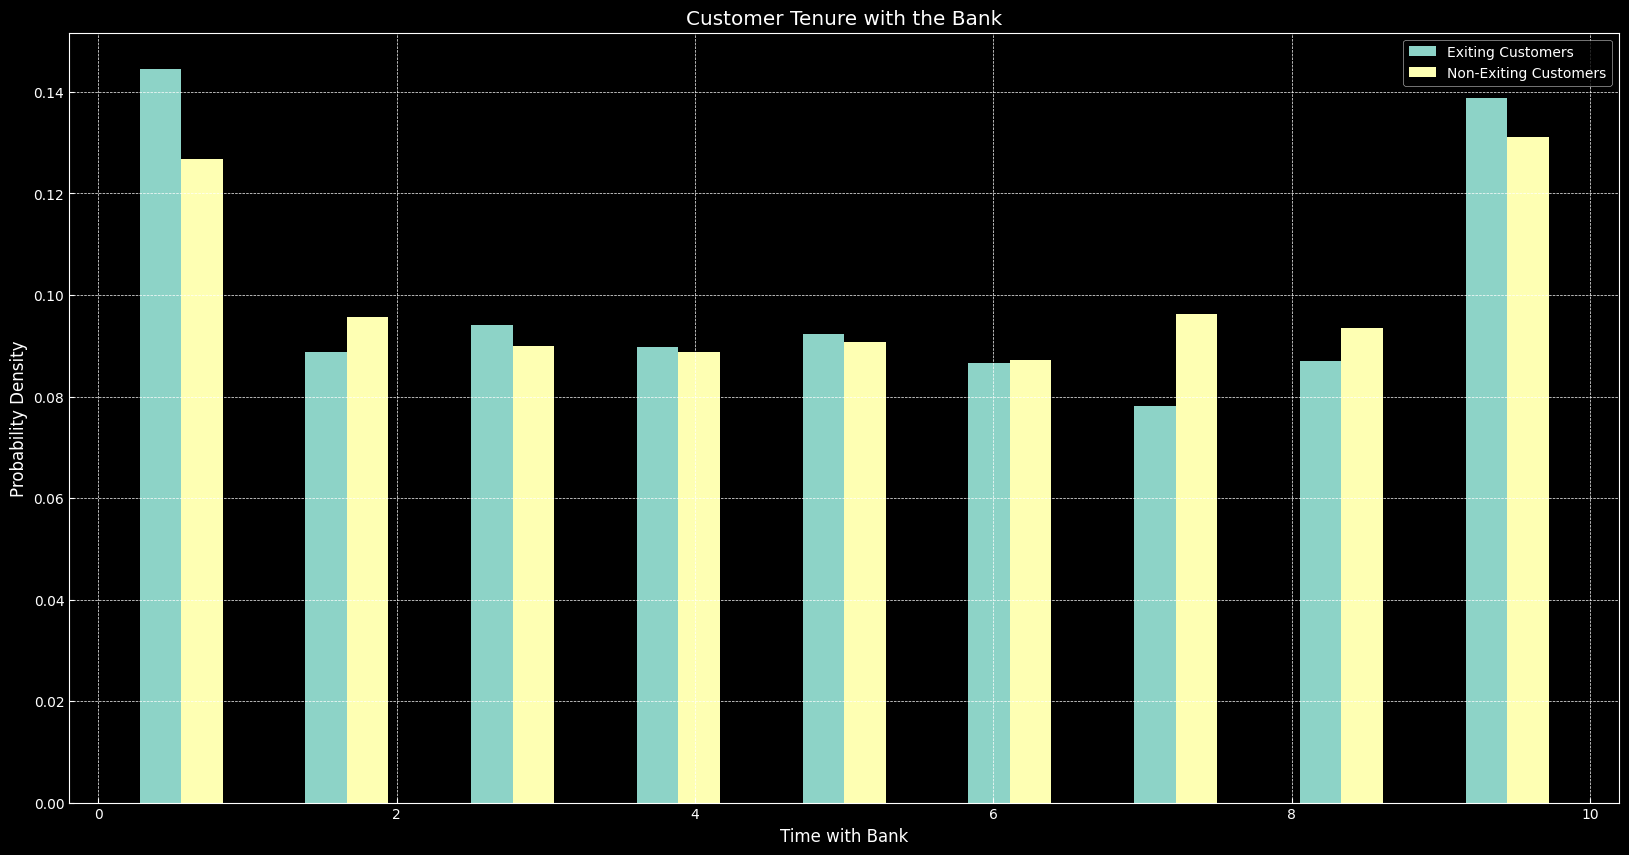

In [185]:
plt.figure(figsize=(20,10))
plt.style.use('dark_background')
plt.hist([df_exit['Tenure'], df_nonexit['Tenure']], density=True, bins=np.linspace(0, 10, 10), \
         label=["Exiting Customers", "Non-Exiting Customers"], rwidth=0.5)
plt.title('Customer Tenure with the Bank')
plt.xlabel("Time with Bank")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

* ___Tenure distribution does not seem to materially differ between the customers leaving and the customers staying.___

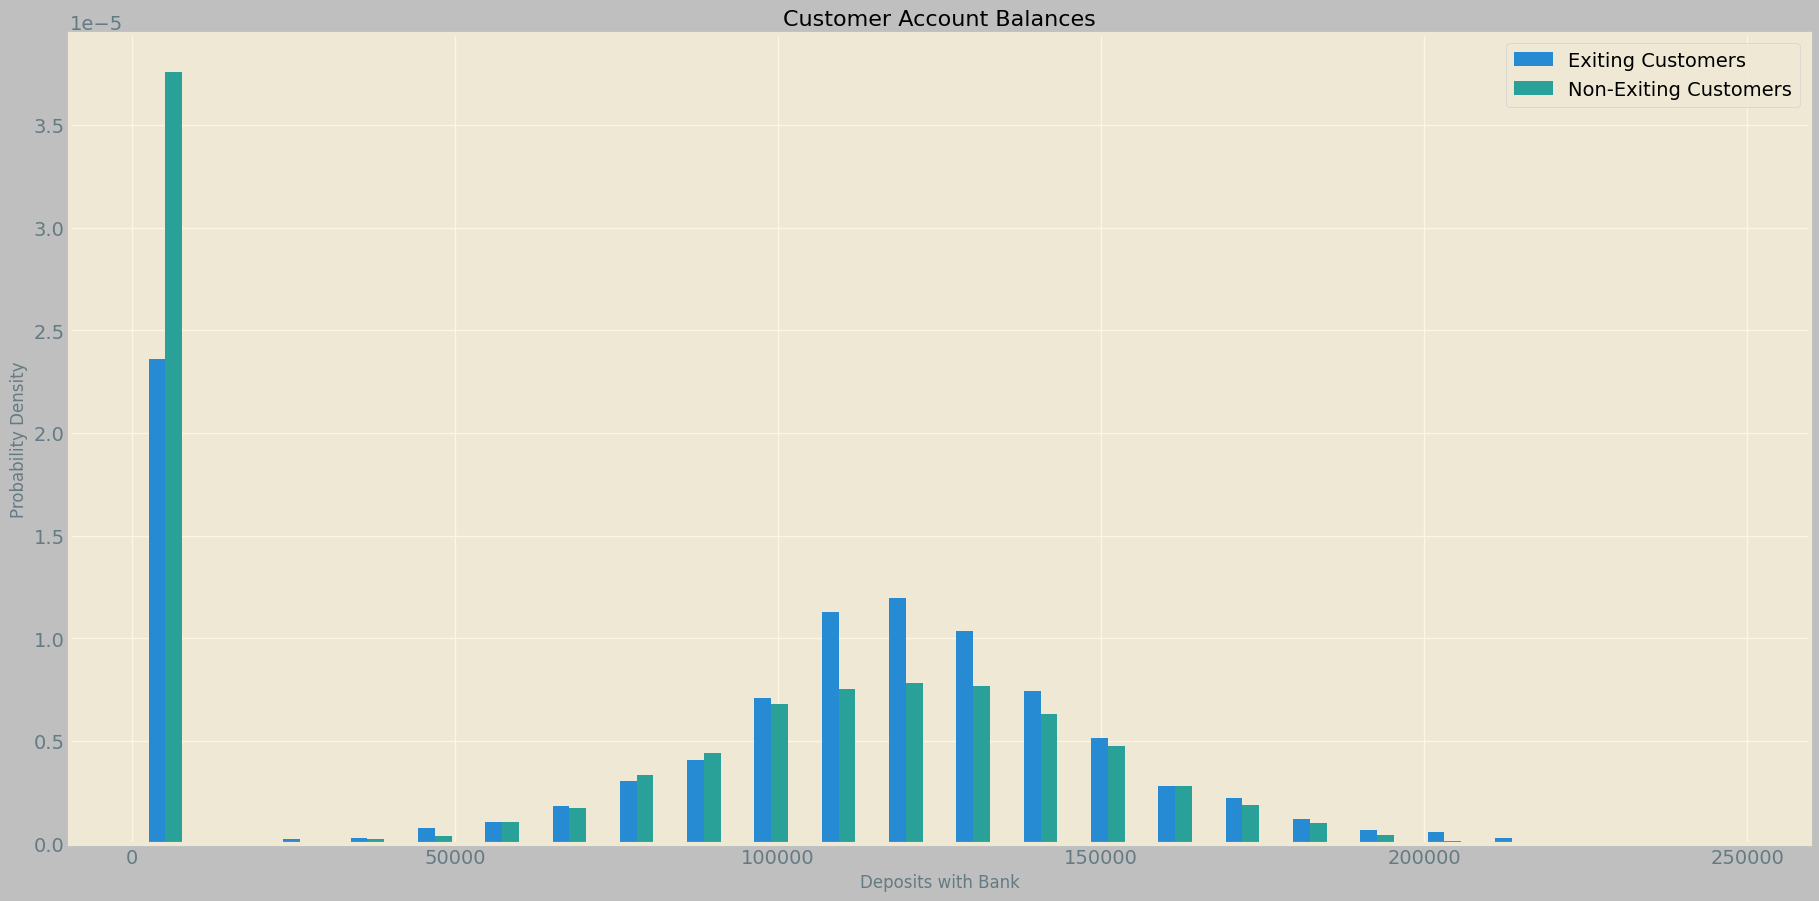

In [201]:
plt.figure(figsize=(20,10))
plt.style.use('Solarize_Light2')
plt.hist([df_exit['Balance'], df_nonexit['Balance']], density=True, bins=np.linspace(0, 250000, 25), \
         label=["Exiting Customers", "Non-Exiting Customers"], rwidth=0.5)
plt.title('Customer Account Balances')
plt.xlabel("Deposits with Bank")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

* ___Interstingly, customers with low balances make up a greater relative amount of staying customers than leaving customers, while a greater amount of customers with moderate to high balances make up the leaving customers than staying customers. As said earlier, both the exiting and non-exiting customer balance distributions are fairly normally distributed around moderate balances, but the skew of staying customers having low balances affects the probability density over the moderate balance amounts.___

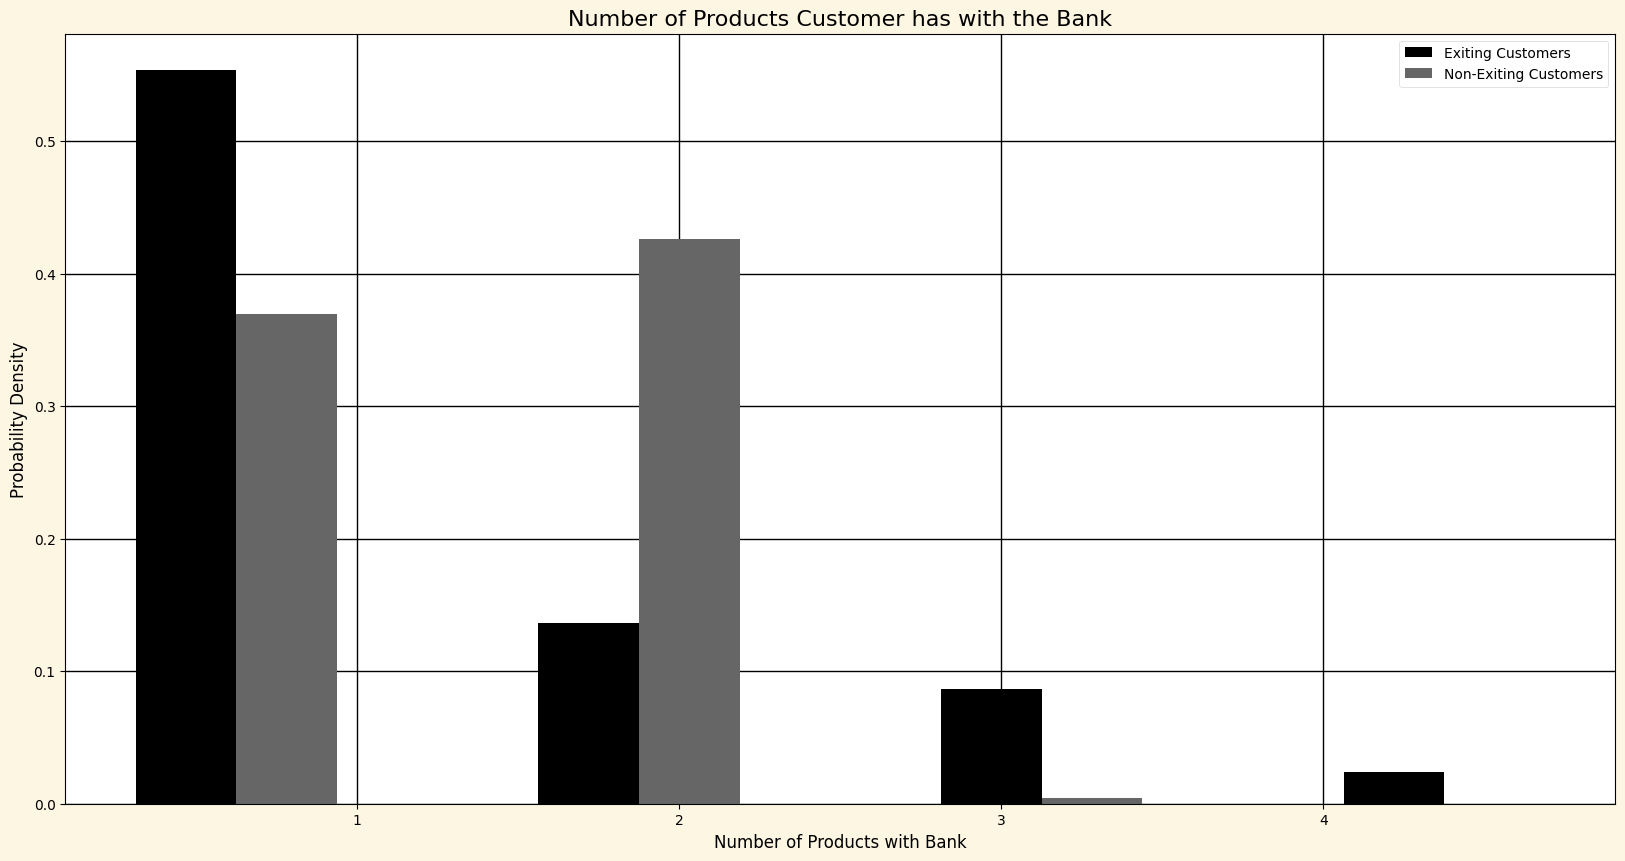

In [187]:
plt.figure(figsize=(20,10))
plt.style.use('grayscale')
plt.hist([df_exit['NumOfProducts'], df_nonexit['NumOfProducts']], density=True, bins=np.linspace(0, 5, 5), \
         label=["Exiting Customers", "Non-Exiting Customers"], rwidth=0.5)
plt.title('Number of Products Customer has with the Bank')
plt.xlabel("Number of Products with Bank")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

* ___Customers with only 1 product with the bank on a relative basis seem to be withdrawing from the bank; customers with 2 products tend to be the ones staying with the bank on a relative basis.___

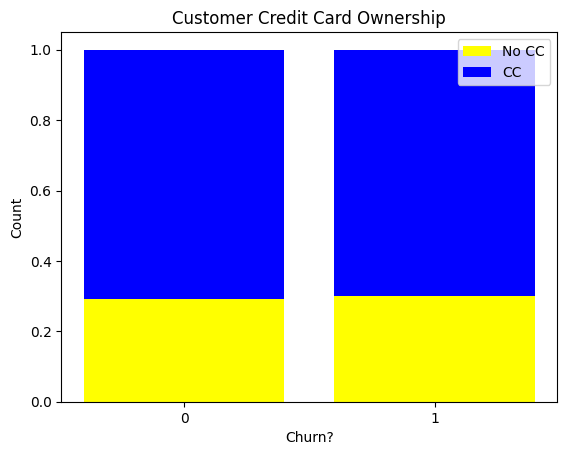

In [180]:
x = [0, 1]
NoCrCard = np.array([(len(df.loc[(df['HasCrCard'] == 0) & (df['Exited'] == 0)])) /(len(df.loc[df['Exited'] == 0])), \
          (len(df.loc[(df['HasCrCard'] == 0) & (df['Exited'] == 1)])) /(len(df.loc[df['Exited'] == 1]))])
CrCard = np.array([(len(df.loc[(df['HasCrCard'] == 1) & (df['Exited'] == 0)])) /(len(df.loc[df['Exited'] == 0])), \
          (len(df.loc[(df['HasCrCard'] == 1) & (df['Exited'] == 1)])) /(len(df.loc[df['Exited'] == 1]))])

plt.bar(x, NoCrCard, color='yellow')
plt.bar(x, CrCard, bottom=NoCrCard, color='blue')
plt.xlabel("Churn?")
plt.ylabel("Count")
plt.legend(["No CC", "CC"])
plt.title("Customer Credit Card Ownership")
plt.style.use('bmh')
plt.xticks([0,1])
plt.show()

* ___Credit card ownership does not materially differ between the customers leaving and the customers staying.___

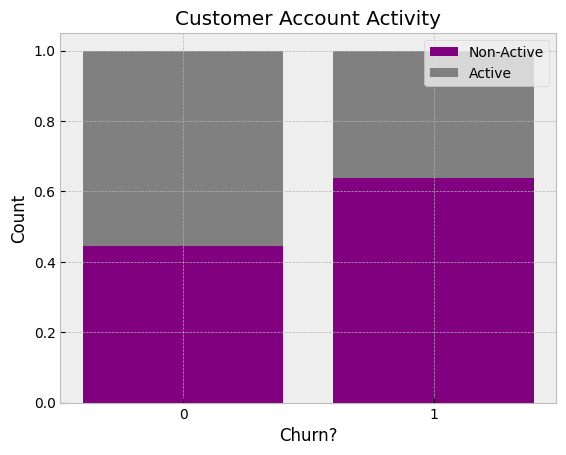

In [182]:
x = [0, 1]
NonActive = np.array([(len(df.loc[(df['IsActiveMember'] == 0) & (df['Exited'] == 0)])) /(len(df.loc[df['Exited'] == 0])), \
          (len(df.loc[(df['IsActiveMember'] == 0) & (df['Exited'] == 1)])) /(len(df.loc[df['Exited'] == 1]))])
Active = np.array(([(len(df.loc[(df['IsActiveMember'] == 1) & (df['Exited'] == 0)])) /(len(df.loc[df['Exited'] == 0])), \
          (len(df.loc[(df['IsActiveMember'] == 1) & (df['Exited'] == 1)])) /(len(df.loc[df['Exited'] == 1]))]))

plt.bar(x, NonActive, color='purple')
plt.bar(x, Active, bottom=NonActive, color='gray')
plt.xlabel("Churn?")
plt.ylabel("Count")
plt.legend(["Non-Active", "Active"])
plt.title("Customer Account Activity")
plt.xticks([0,1])
plt.show()

* ___It appears more of the customers that are leaving the bank are non-active members on a relative basis.___

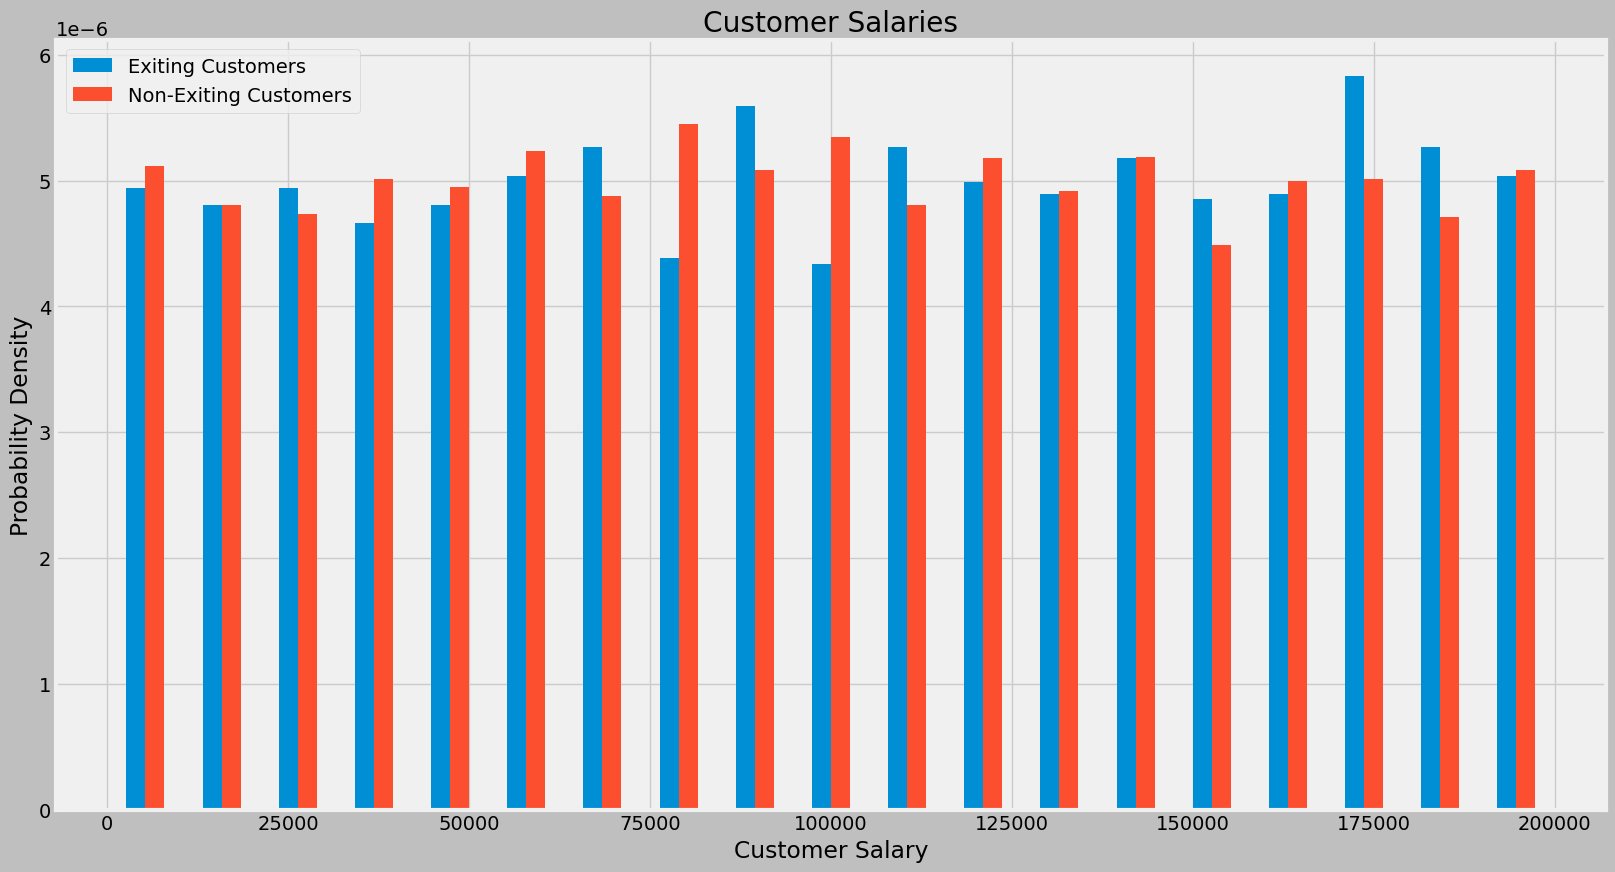

In [188]:
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
plt.hist([df_exit['EstimatedSalary'], df_nonexit['EstimatedSalary']], density=True, bins=np.linspace(0, 200000, 20), \
         label=["Exiting Customers", "Non-Exiting Customers"], rwidth=0.5)
plt.title('Customer Salaries')
plt.xlabel("Customer Salary")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

* ___Estimated salary does not materially differ between the customers leaving and the customers staying.___

# 7. Correlations

To end, let's just take a look at a heatmap, to look at correlations of all variables in the dataset.

<AxesSubplot:>

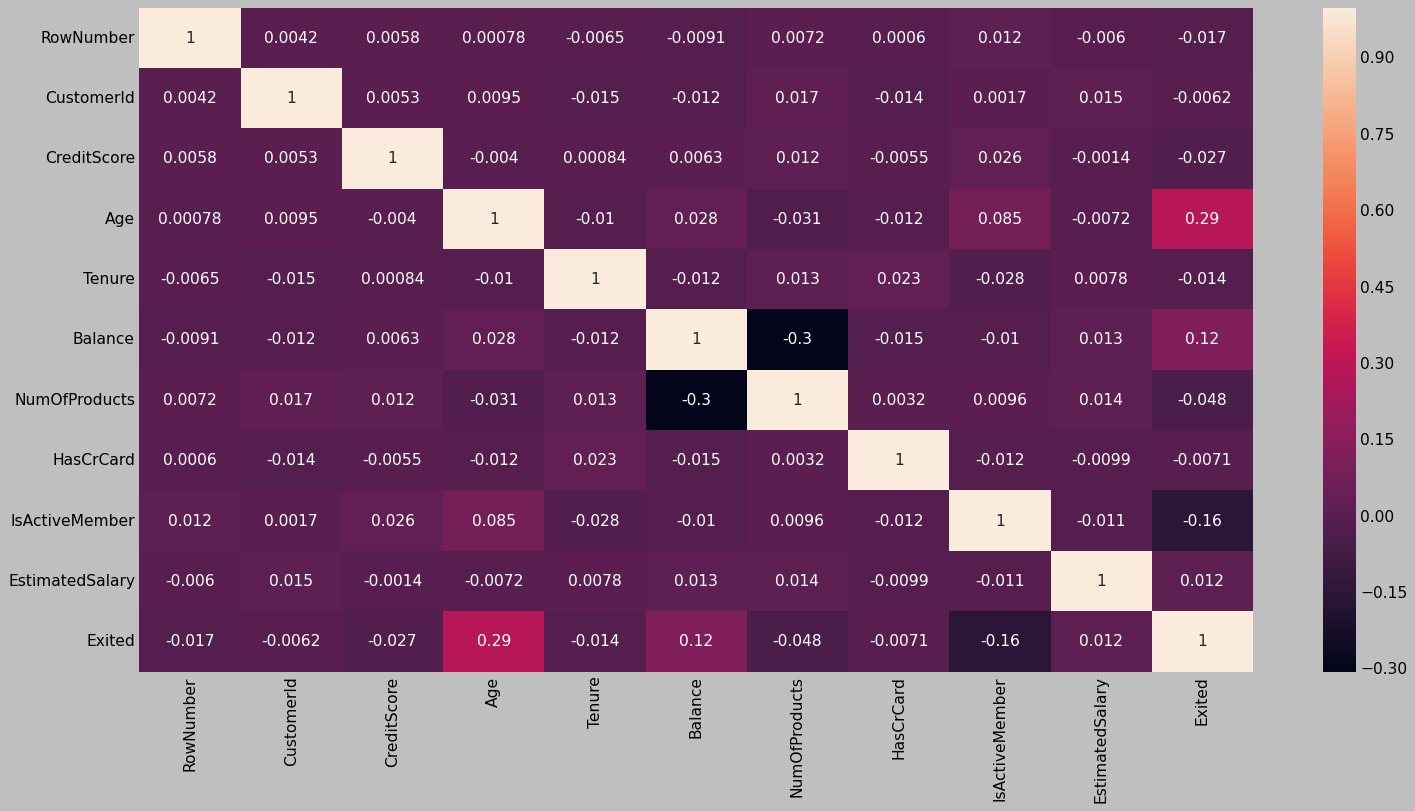

In [151]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

* Of note are the variables with higher than a +/-0.1 correlation with the class variable Exited, which were Balance (0.12), IsActiveMember (-0.16) and most significantly Age (0.29). This makes sense, as the higher the Age and Balance, the more likely the person was leaving the bank (on a relative basis).


* Interesting is that the strongest relationship in the whole relationship is between Balance and NumOfProducts, which could be read into multiple ways.

# 8. Conclusion

We conducted cohort analysis on a bank churn dataset, with  information on customers who have been staying versus customers who have been leaving. The target variable Exited was imbalanced, so we visualized/analyzed this on a relative basis. 

What did we find, in plain language? Who is leaving?


___1. People from Germany___


___2. Females___


___3. Older people, particularly over 40___


___4. People with moderate to high balances___


___5. People with few products with the bank___


___6. People who are non-active with the bank___


This could probably be made sense of, particularly relating to the age demographic; it could be people who have more money who want to enjoy it and/or want to not risk too much concentration in one bank (as is smart in the US with the FDIC limit of 250,000 dollars), who kind of just have their nest-egg money that they are retired and now living off of...but no way to know for sure!